### Swissroll with noise = 0.02

In [1]:
%matplotlib inline

In [2]:
# Not really required
import sys
sys.path.insert(0, '../../..')

In [3]:
from pyLDLE2 import datasets
from pyLDLE2 import buml_, util_

matplotlib.get_backend() =  module://matplotlib_inline.backend_inline


In [4]:
noise = 0.02

In [5]:
save_dir_root = '../data/pyLDLE2/swissroll_with_noise_'+str(noise)+'/'

In [6]:
X, labelsMat, ddX = datasets.Datasets().noisyswissroll(noise=noise)

X.shape =  (10260, 3)


In [7]:
# The supplied options would override the default options
buml_obj = buml_.BUML(local_opts={'algo':'LPCA', 'k': 35},
                  intermed_opts={'eta_min': 10},
                  vis_opts={'c': labelsMat[:,0], 'save_dir': save_dir_root},
                  verbose=True, debug=True)

local_opts['k_nn0'] = 875 is created.
Options provided:
local_opts:
{
    "Atilde_method": "LDLE_1",
    "N": 100,
    "U_method": "k_nn",
    "algo": "LPCA",
    "alpha": 1,
    "debug": true,
    "delta": 0.9,
    "gl_type": "unnorm",
    "k": 35,
    "k_nn": 49,
    "k_nn0": 875,
    "k_tune": 7,
    "lambda1_decay": 0.75,
    "lambda1_init": 8,
    "lambda1_min": 0.001,
    "max_iter": 300,
    "max_sparsity": 0.9,
    "metric": "euclidean",
    "n_proc": 32,
    "p": 0.99,
    "power": 5,
    "pp_n_thresh": 32,
    "radius": 0.5,
    "reg": 0.0,
    "scale_by": "gamma",
    "tau": 50,
    "to_postprocess": true,
    "verbose": true
}
intermed_opts:
{
    "algo": "best",
    "debug": true,
    "eta_max": 25,
    "eta_min": 10,
    "len_S_thresh": 256,
    "local_algo": "LPCA",
    "metric": "euclidean",
    "n_proc": 32,
    "n_times": 4,
    "verbose": true
}
global_opts:
{
    "add_dim": false,
    "align_transform": "rigid",
    "align_w_parent_only": true,
    "alpha": 0.3,
   

In [ ]:
buml_obj.fit(X=X)

Computing local views using LPCA
local_param: all 10260 points processed...
max distortion is 3431.339587
Done.
##############################
Time elapsed from last time log: 1.6 seconds
Total time elapsed: 1.6 seconds
##############################
Posprocessing local parameterizations.
#Param replaced: 9792, max distortion: 14.923880
#Param replaced: 4045, max distortion: 14.570454
#Param replaced: 1341, max distortion: 14.570454
#Param replaced: 408, max distortion: 14.570454
#Param replaced: 120, max distortion: 14.570454
#Param replaced: 26, max distortion: 14.570454
#Param replaced: 8, max distortion: 14.570454
#Param replaced: 5, max distortion: 14.570454
#Param replaced: 1, max distortion: 14.570454
#Param replaced: 0, max distortion: 14.570454
Max local distortion after postprocessing: 14.570453999566622
Done.
##############################
Time elapsed from last time log: 11.1 seconds
Total time elapsed: 12.6 seconds
##############################
Max local distortion = 14.5

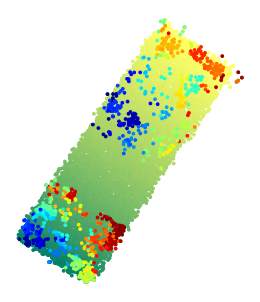

In [11]:
buml_obj.GlobalViews.vis_embedding(buml_obj.GlobalViews.y_final, buml_obj.vis, buml_obj.vis_opts,
                               buml_obj.GlobalViews.color_of_pts_on_tear_final,
                               title='Final global embedding', )

In [12]:
util_.save(save_dir_root, 'lpca.dat', [X, labelsMat, buml_obj])